## Description:
A third-party travel insurance servicing company that is based in Singapore

## Dataset Information
1)Claim Status (Claim.Status)

2)Name of agency (Agency)

3)Type of travel insurance agencies (Agency.Type)

4)Distribution channel of travel insurance agencies (Distribution.Channel)

5)Name of the travel insurance products (Product.Name)

6)Duration of travel (Duration)

7)Destination of travel (Destination)

8)Amount of sales of travel insurance policies (Net.Sales)

9)Commission received for travel insurance agency (Commission)

10)Gender of insured (Gender)

11)Age of insured (Age)

## Problem Statement
The objective of travel insurance dataset is to predict commission. The dataset of several predictors (independent)variables and one target variable that is comission.

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
travels = pd.read_excel("travels.xlsx")
travels.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
2,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,M,34
3,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,M,26
4,C2B,Airlines,Online,Annual Silver Plan,No,364,SINGAPORE,389.00,97.25,F,30


## 1. Exploratory Data Analysis

1.1 Head of dataset

1.2 The shape of dataset

1.3 List types of all columns

1.4 Information of the dataset

1.5 Summary of the dataset

### 1.1 Head of the dataset

In [3]:
travels.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
2,C2B,Airlines,Online,Bronze Plan,Yes,12,SINGAPORE,94.00,23.50,M,34
3,C2B,Airlines,Online,Silver Plan,No,190,SINGAPORE,294.75,73.69,M,26
4,C2B,Airlines,Online,Annual Silver Plan,No,364,SINGAPORE,389.00,97.25,F,30


### 1.2 Shape of dataset

In [4]:
travels.shape

(60764, 11)

# 1.3 Types of all columns

In [5]:
travels.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'net_sales', 'commision', 'Gender',
       'Age'],
      dtype='object')

# 1.4 Information about column

In [6]:
travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60764 entries, 0 to 60763
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                60764 non-null  object 
 1   Agency Type           60764 non-null  object 
 2   Distribution Channel  60764 non-null  object 
 3   Product Name          60764 non-null  object 
 4   Claim                 60764 non-null  object 
 5   Duration              60764 non-null  int64  
 6   Destination           60764 non-null  object 
 7   net_sales             60764 non-null  float64
 8   commision             60764 non-null  float64
 9   Gender                17787 non-null  object 
 10  Age                   60764 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.1+ MB


# 1.5 Describing the dataset

In [7]:
travels.describe()

,Duration,net_sales,commision,Age
count,60764.000000,60764.000000,60764.000000,60764.000000
mean,48.941824,43.098282,9.345712,39.983987
std,102.749482,47.786060,19.469582,14.027760
min,-2.000000,0.070000,0.000000,0.000000
25%,9.000000,19.800000,0.000000,35.000000
50%,22.000000,28.000000,0.000000,36.000000
75%,52.000000,49.500000,10.500000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


# 2. Finding Null Values

In [8]:
travels.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
net_sales                   0
commision                   0
Gender                  42977
Age                         0
dtype: int64

# 2.1 Checking for duplicates

In [9]:
travels.duplicated().sum()

7935

# Removing duplicates

In [10]:
travels.drop_duplicates(inplace=True)

In [11]:
travels.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
net_sales                   0
commision                   0
Gender                  36292
Age                         0
dtype: int64

# I want to remove null values becasue my data has 60000 rows it won't effect to my prediction

In [12]:
travels.dropna(inplace=True)

# 2.3 Checking for null again

In [13]:
travels.isnull().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
net_sales               0
commision               0
Gender                  0
Age                     0
dtype: int64

# checking outliers

<Axes: >

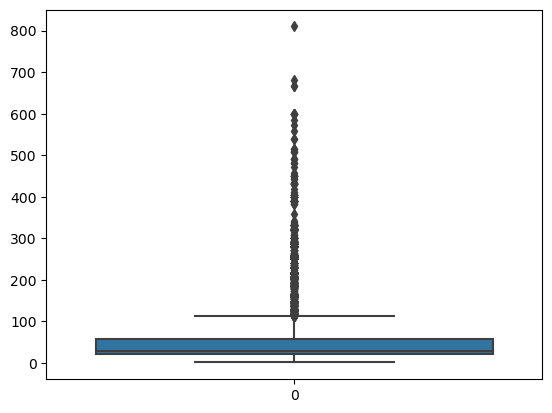

In [14]:
sns.boxplot(travels.net_sales)

In [15]:
Q1 = travels.net_sales.quantile(0.25)
Q3 = travels.net_sales.quantile(0.75)
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
travels=travels[(travels.net_sales>lower_limit)&(travels.net_sales<upper_limit)]

<Axes: >

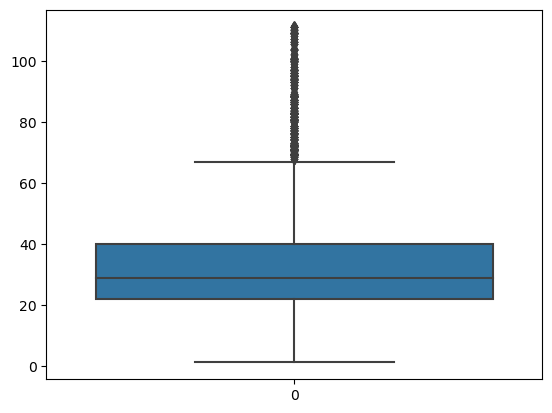

In [16]:
sns.boxplot(travels.net_sales)

<Axes: >

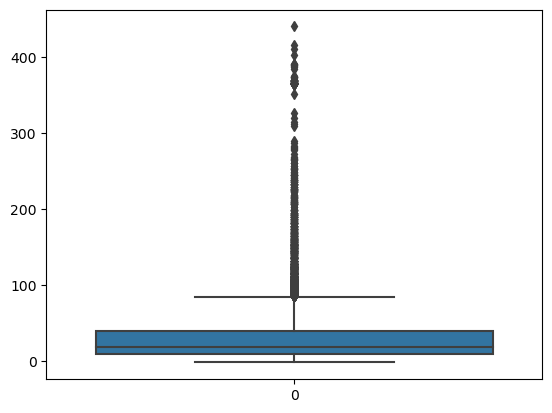

In [17]:
sns.boxplot(travels.Duration)

In [18]:
Q1 = travels.Duration.quantile(0.25)
Q3 = travels.Duration.quantile(0.75)
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
travels=travels[(travels.Duration>lower_limit)&(travels.Duration<upper_limit)]

<Axes: >

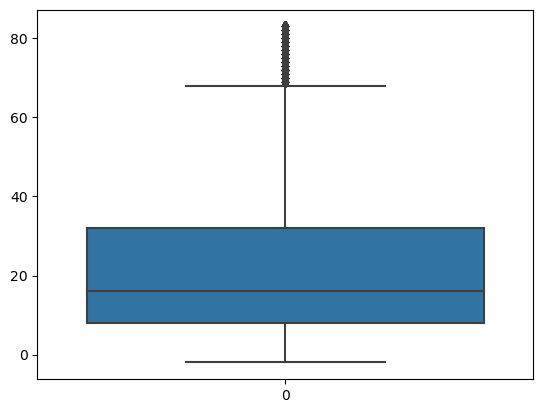

In [19]:
sns.boxplot(travels.Duration)

<Axes: >

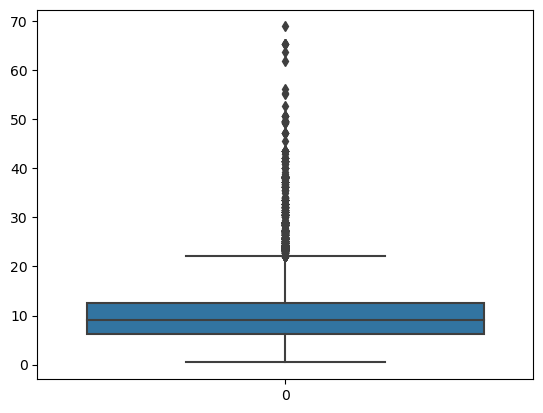

In [20]:
 sns.boxplot(travels.commision)

In [21]:
Q1 = travels.commision.quantile(0.25)
Q3 = travels.commision.quantile(0.75)
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit
travels=travels[(travels.commision>lower_limit)&(travels.commision<upper_limit)]

<Axes: >

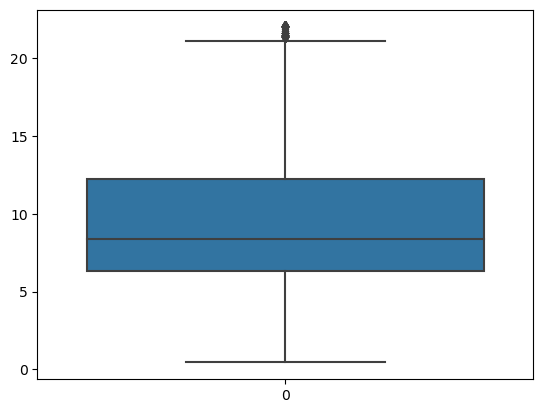

In [22]:
 sns.boxplot(travels.commision)

<Axes: >

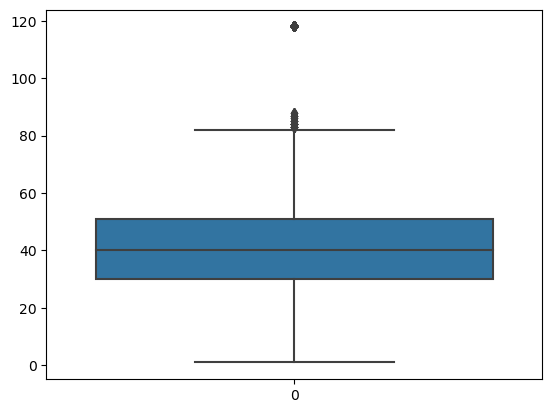

In [23]:
 sns.boxplot(travels.Age)

In [24]:
travels[(travels.Age>90)]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
81,JWT,Airlines,Online,Value Plan,No,11,INDIA,50.0,20.00,M,118
336,JWT,Airlines,Online,Value Plan,No,16,INDIA,50.0,20.00,M,118
371,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,M,118
372,CCR,Travel Agency,Offline,Comprehensive Plan,No,5,MALAYSIA,29.0,9.57,F,118
527,JWT,Airlines,Online,Value Plan,No,10,INDIA,31.0,12.40,M,118
...,...,...,...,...,...,...,...,...,...,...,...
59450,CCR,Travel Agency,Offline,Comprehensive Plan,No,13,MALAYSIA,29.0,9.57,F,118
59965,JWT,Airlines,Online,Value Plan,No,6,INDIA,50.0,20.00,M,118
60394,ART,Airlines,Online,Value Plan,No,14,FRANCE,59.0,20.65,M,118
60534,ART,Airlines,Online,Value Plan,No,42,HONG KONG,61.0,21.35,M,118


In [25]:
travels=travels[(travels.Age<90)]

<Axes: >

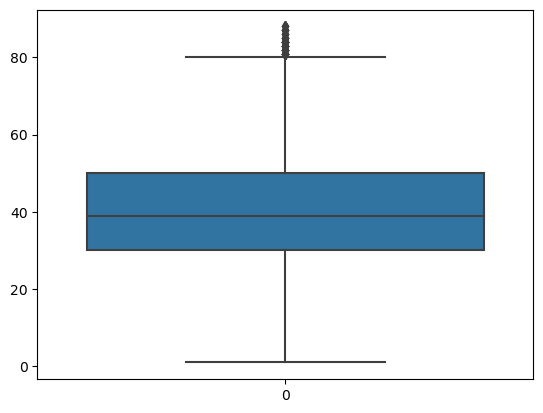

In [26]:
sns.boxplot(travels.Age)

# 4. Value counts on each category of data

In [27]:
travels

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
82,RAB,Airlines,Online,Value Plan,No,4,BRUNEI DARUSSALAM,15.00,6.00,M,44
85,JZI,Airlines,Online,Basic Plan,No,45,AUSTRALIA,26.00,9.10,M,31
87,JZI,Airlines,Online,Basic Plan,No,5,INDONESIA,22.00,7.70,F,29
...,...,...,...,...,...,...,...,...,...,...,...
60757,JZI,Airlines,Online,Basic Plan,No,10,CHINA,35.00,12.25,M,51
60758,JZI,Airlines,Online,Basic Plan,No,5,BRUNEI DARUSSALAM,18.00,6.30,M,27
60760,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.00,14.00,F,40
60761,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.00,6.30,M,57


# reset the index

In [28]:
travels.reset_index(inplace=True)

In [29]:
travels

,index,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
2,82,RAB,Airlines,Online,Value Plan,No,4,BRUNEI DARUSSALAM,15.00,6.00,M,44
3,85,JZI,Airlines,Online,Basic Plan,No,45,AUSTRALIA,26.00,9.10,M,31
4,87,JZI,Airlines,Online,Basic Plan,No,5,INDONESIA,22.00,7.70,F,29
...,...,...,...,...,...,...,...,...,...,...,...,...
12006,60757,JZI,Airlines,Online,Basic Plan,No,10,CHINA,35.00,12.25,M,51
12007,60758,JZI,Airlines,Online,Basic Plan,No,5,BRUNEI DARUSSALAM,18.00,6.30,M,27
12008,60760,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.00,14.00,F,40
12009,60761,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.00,6.30,M,57


# 4.1 Checking values of Agency_type

In [30]:
travels['Agency Type'].value_counts()

Airlines         10981
Travel Agency     1030
Name: Agency Type, dtype: int64

# 4.2 Checking for each value under agency

In [31]:
travels.Agency.value_counts()

C2B    5457
JZI    4911
TST     454
RAB     409
ART     204
LWC     200
KML     172
CCR      92
CSR      56
CBH      53
ADM       2
CWT       1
Name: Agency, dtype: int64

# 4.3 Checking for Destination counts

In [32]:
travels.Destination.value_counts()

SINGAPORE                           5476
THAILAND                            1223
CHINA                                967
MALAYSIA                             859
INDONESIA                            637
HONG KONG                            538
PHILIPPINES                          440
BRUNEI DARUSSALAM                    409
VIET NAM                             268
MYANMAR                              193
TAIWAN, PROVINCE OF CHINA            178
JAPAN                                166
KOREA, REPUBLIC OF                   157
AUSTRALIA                            147
INDIA                                107
SRI LANKA                             48
CAMBODIA                              46
UNITED ARAB EMIRATES                  27
MACAO                                 22
LAO PEOPLE'S DEMOCRATIC REPUBLIC      18
NEW ZEALAND                           15
NETHERLANDS                           13
BANGLADESH                             8
UNITED KINGDOM                         7
UNITED STATES   

# 4.4 Checking for Distribution_Channel

In [33]:
travels['Distribution Channel'].value_counts()

Online     11352
Offline      659
Name: Distribution Channel, dtype: int64

# 4.5 Checking for claim counts

In [34]:
travels.Claim.value_counts()

No     11661
Yes      350
Name: Claim, dtype: int64

# 4.6 checking for product_name

In [35]:
travels['Product Name'].value_counts()

Basic Plan                             4504
Bronze Plan                            3394
Silver Plan                            1832
Value Plan                              965
Travel Cruise Protect                   454
Gold Plan                               231
Comprehensive Plan                      193
24 Protect                              184
Single Trip Travel Protect Silver        90
Single Trip Travel Protect Gold          81
Premier Plan                             53
Single Trip Travel Protect Platinum      29
Rental Vehicle Excess Insurance           1
Name: Product Name, dtype: int64

# 5. clustering Product name

In [36]:
Product_Name=travels['Product Name'].value_counts()  #i assigned data to rest_type variable
Product_Name
product_name_lessthan1000=Product_Name[Product_Name<1000]  # filtered the data lessthan 1000 and assig
product_name_lessthan1000
def handle_rest_type(value):                   # using function like whereever 1 to 1000 data is their then i shows 'Others'
    if(value in product_name_lessthan1000):                                        # by using if statement
        return 'others'
    else:
        return value
travels['Product Name']=travels['Product Name'].apply(handle_rest_type) # same like assigned the data
travels['Product Name'].value_counts()

Basic Plan     4504
Bronze Plan    3394
others         2281
Silver Plan    1832
Name: Product Name, dtype: int64

## 5.2 clustering on destination

In [37]:
values_travels = travels.Destination.value_counts()
values_travels800=values_travels[values_travels<800]  # filtered the data lessthan 1000 and assig
def handle_rest_type(value):                   # using function like whereever 1 to 1000 data is their then i shows 'Others'
    if(value in values_travels800):                                        # by using if statement
        return 'others'
    else:
        return value
travels['Destination']=travels['Destination'].apply(handle_rest_type) # same like assigned the data
travels['Destination'].value_counts()

SINGAPORE    5476
others       3486
THAILAND     1223
CHINA         967
MALAYSIA      859
Name: Destination, dtype: int64

# 6. Data Visulazitation

# 6.1 Normalizaton check

<Axes: xlabel='commision', ylabel='Density'>

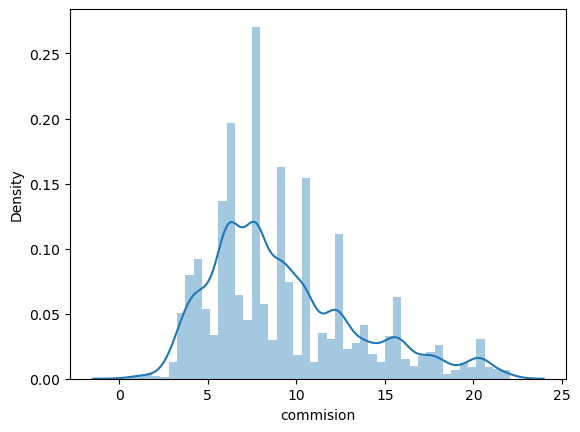

In [38]:
sns.distplot(travels['commision'])

<Axes: xlabel='commision', ylabel='Density'>

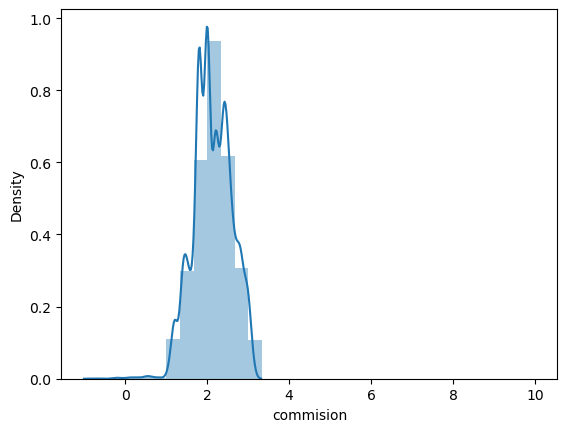

In [39]:
new_df=travels.copy()
new_df['commision']=np.log(travels['commision']).round(1)
sns.distplot(new_df['commision'],bins=30,hist_kws={"range": [0,10]})

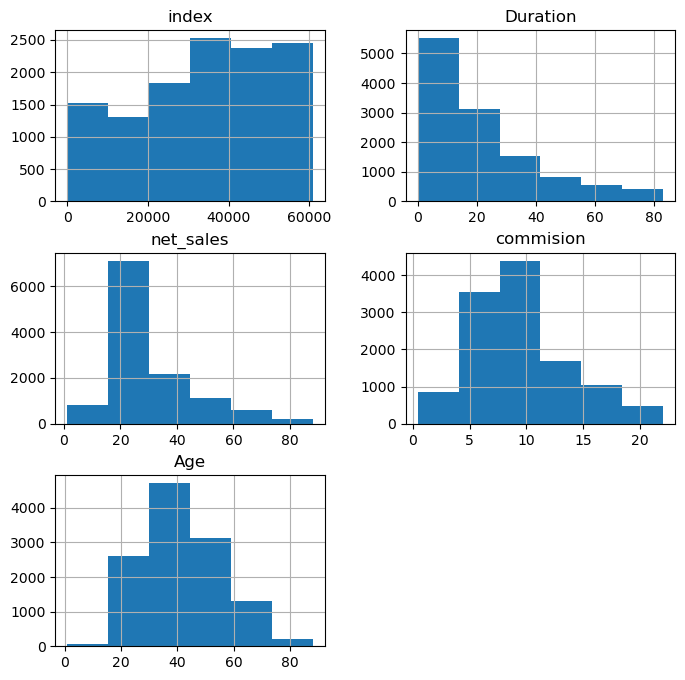

In [40]:
travels.hist(bins=6,figsize=(8,8))
plt.show()

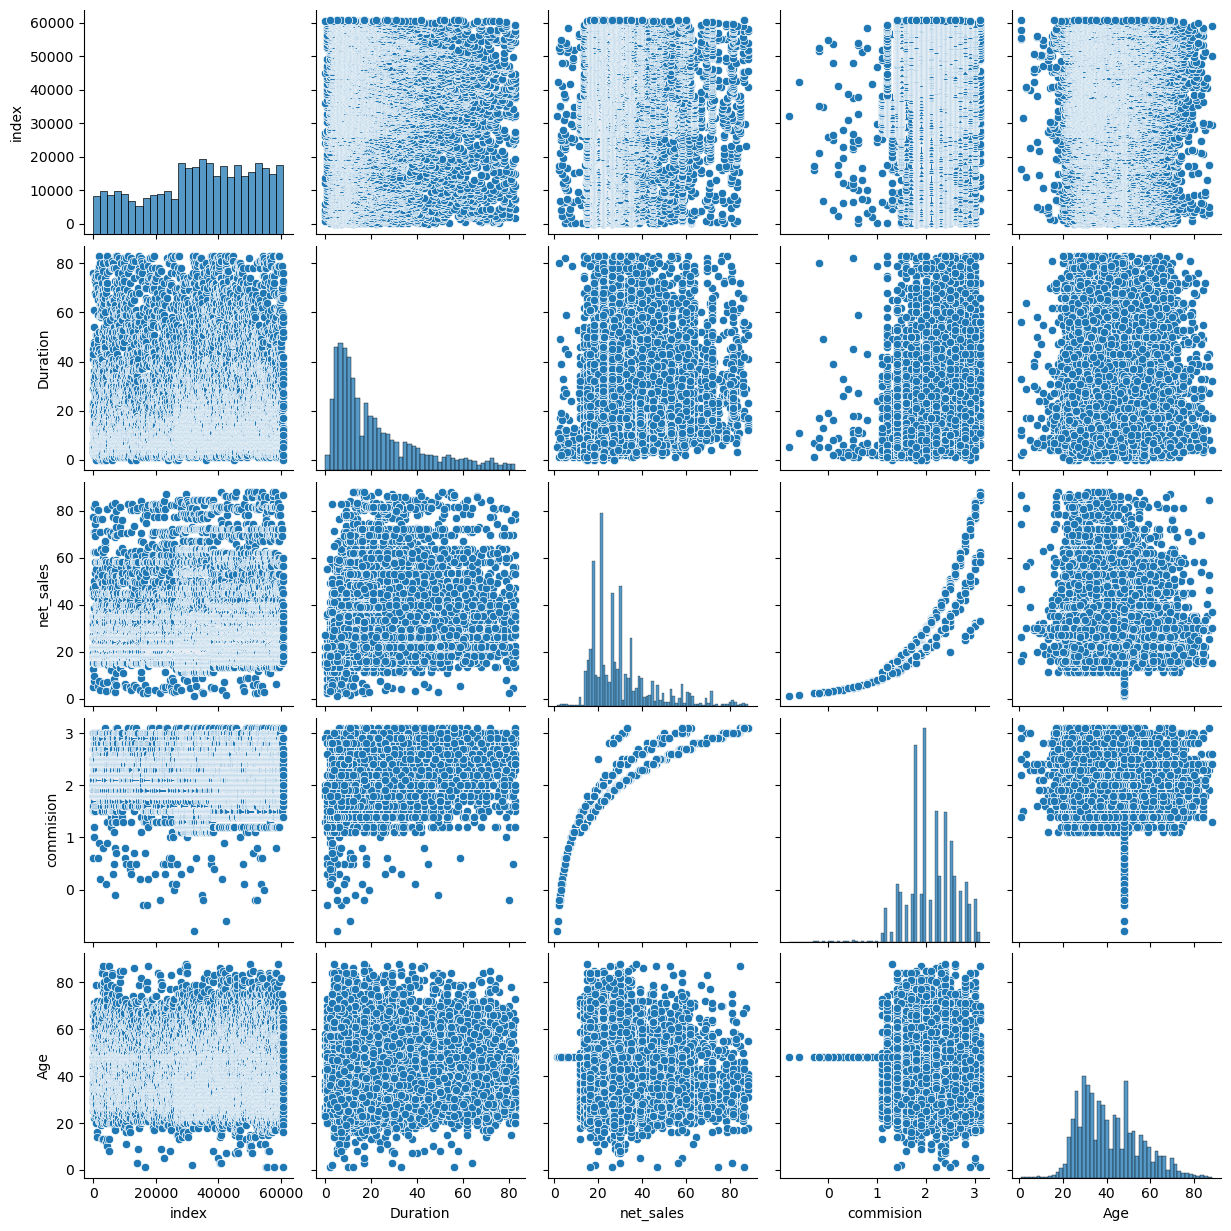

In [41]:
sns.pairplot(new_df)

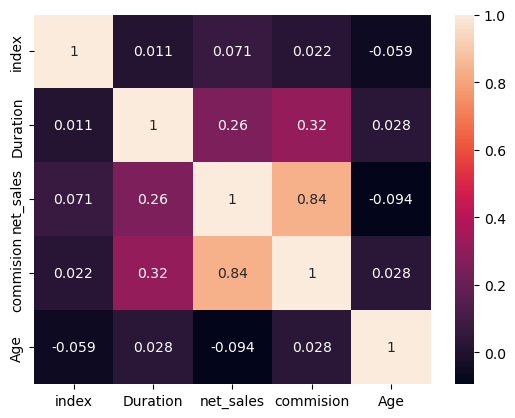

In [42]:
sns.heatmap(new_df.corr(), annot=True)
plt.show()

In [43]:
for i in new_df.columns:
    print(f'Column Name : {i}','\n')
    print(new_df[i].unique(),'\n')
    print(f'Number of unique values=',new_df[i].nunique(),'\n')

Column Name : index 

[    0     1    82 ... 60760 60761 60763] 

Number of unique values= 12011 

Column Name : Agency 

['C2B' 'RAB' 'JZI' 'ART' 'CBH' 'KML' 'CSR' 'CCR' 'ADM' 'LWC' 'TST' 'CWT'] 

Number of unique values= 12 

Column Name : Agency Type 

['Airlines' 'Travel Agency'] 

Number of unique values= 2 

Column Name : Distribution Channel 

['Online' 'Offline'] 

Number of unique values= 2 

Column Name : Product Name 

['Bronze Plan' 'others' 'Basic Plan' 'Silver Plan'] 

Number of unique values= 4 

Column Name : Claim 

['No' 'Yes'] 

Number of unique values= 2 

Column Name : Duration 

[12  7  4 45  5 22 76 41 43  3 20 29 23 13  6  2 15 28 21 34 19  9 18 32
 10 54 24 48 14 36 17 33 31 11 47 61 40  8 39 73 26 30 16 68 75 25 27  1
 35 74 51  0 38 67 71 37 70 44 59 65 77 49 83 52 79 63 80 42 58 66 62 78
 69 72 50 53 64 46 60 55 57 56 81 82] 

Number of unique values= 84 

Column Name : Destination 

['SINGAPORE' 'others' 'THAILAND' 'CHINA' 'MALAYSIA'] 

Number of unique val

<Axes: xlabel='Agency Type', ylabel='count'>

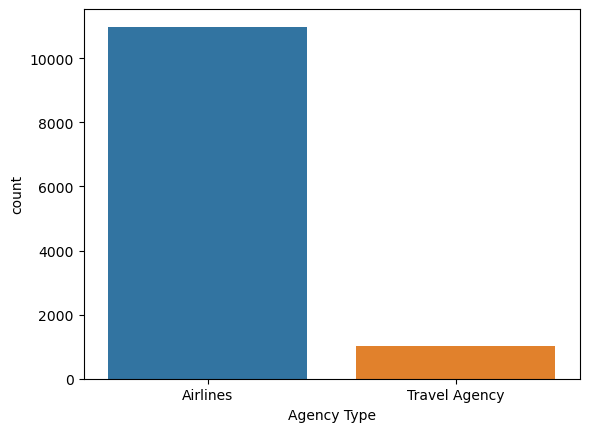

In [44]:
sns.countplot(x=new_df['Agency Type'],orient='v') 

In [45]:
travels.columns

Index(['index', 'Agency', 'Agency Type', 'Distribution Channel',
       'Product Name', 'Claim', 'Duration', 'Destination', 'net_sales',
       'commision', 'Gender', 'Age'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='count'>

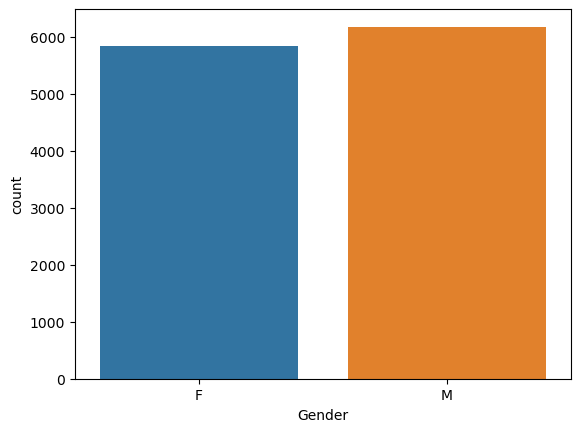

In [46]:
sns.countplot(x=new_df['Gender'],orient='v') 

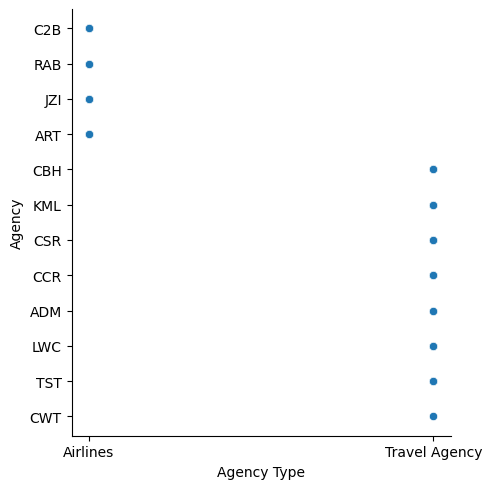

In [47]:
sns.relplot(x='Agency Type',y='Agency',data = new_df)  

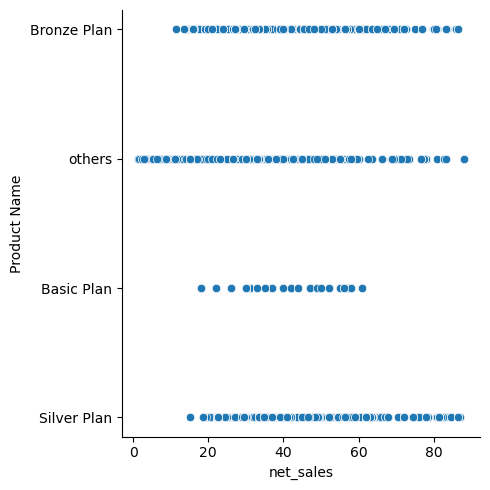

In [48]:
sns.relplot(x='net_sales',y='Product Name',data = new_df)

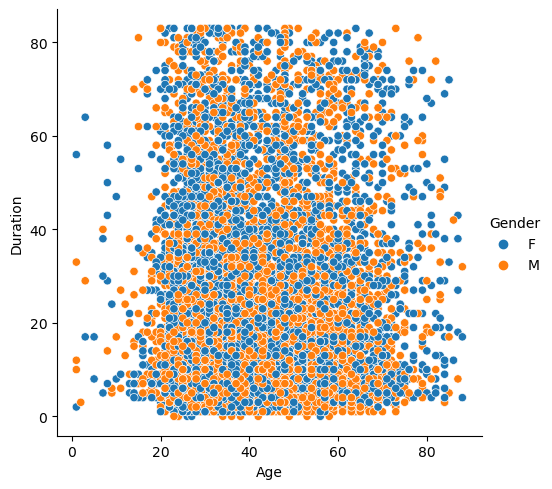

In [49]:
sns.relplot(x='Age',y='Duration',hue='Gender',data=new_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '-0.8'),
  Text(1, 0, '-0.6'),
  Text(2, 0, '-0.3'),
  Text(3, 0, '-0.2'),
  Text(4, 0, '-0.1'),
  Text(5, 0, '0.0'),
  Text(6, 0, '0.1'),
  Text(7, 0, '0.2'),
  Text(8, 0, '0.3'),
  Text(9, 0, '0.4'),
  Text(10, 0, '0.5'),
  Text(11, 0, '0.6'),
  Text(12, 0, '0.7'),
  Text(13, 0, '0.8'),
  Text(14, 0, '0.9'),
  Text(15, 0, '1.0'),
  Text(16, 0, '1.1'),
  Text(17, 0, '1.2'),
  Text(18, 0, '1.3'),
  Text(19, 0, '1.4'),
  Text(20, 0, '1.5'),
  Text(21, 0, '1.6'),
  Text(22, 0, '1.7'),
  Text(23, 0, '1.8'),
  Text(24, 0, '1.9'),
  Text(25, 0, '2.0'),
  Text(26, 0, '2.1'),
  Text(27, 0, '2.2'),
  Text(28, 0, '2.3'),
  Text(29, 0, '2.4'),
  Text(30, 0, '2.5'),
  Text(31, 0, '2.6'),
  Text(32, 0, '2.7'),
  Text(33, 0, '2.8'),
  Text(34, 0, '2.9'),
  Text(35, 0, '3.0'),
  Text(36, 0, '3.1')])

<Figure size 2000x2000 with 0 Axes>

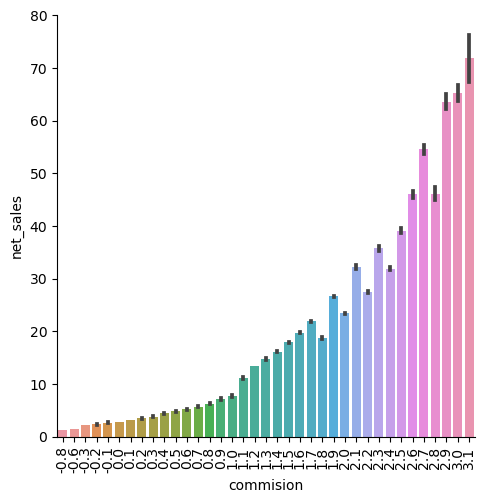

In [50]:
plt.figure(figsize = (20,20))
sns.catplot(x='commision',y='net_sales',kind='bar',data=new_df)
plt.xticks(rotation=90)

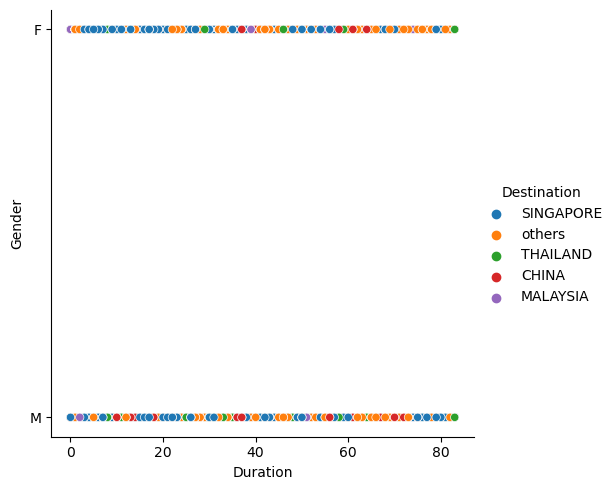

In [51]:
sns.relplot(x='Duration',y='Gender',data=new_df,hue='Destination')

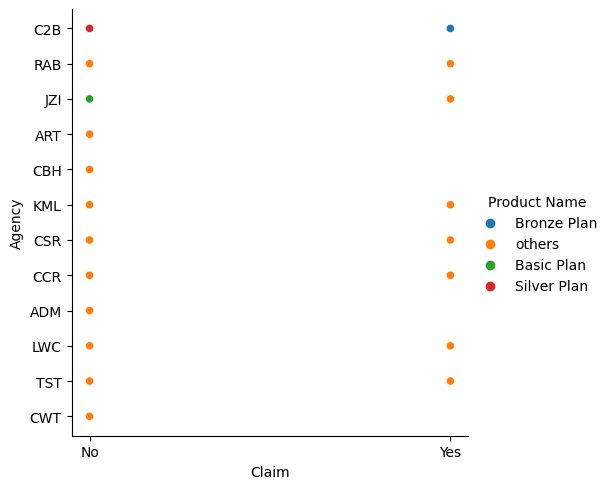

In [52]:
sns.relplot(x='Claim',y='Agency',data=new_df,hue='Product Name')

<Axes: xlabel='net_sales', ylabel='commision'>

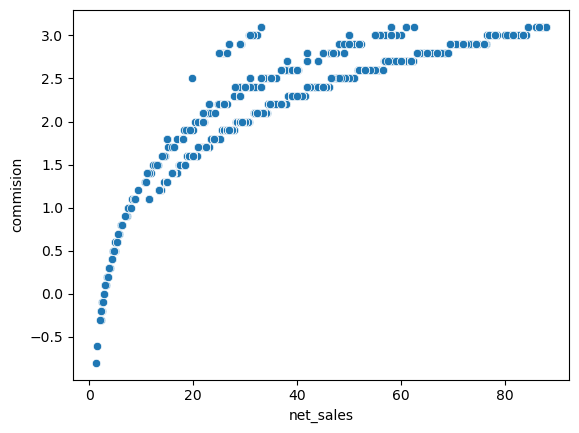

In [53]:
sns.scatterplot(x='net_sales',y='commision',data=new_df)

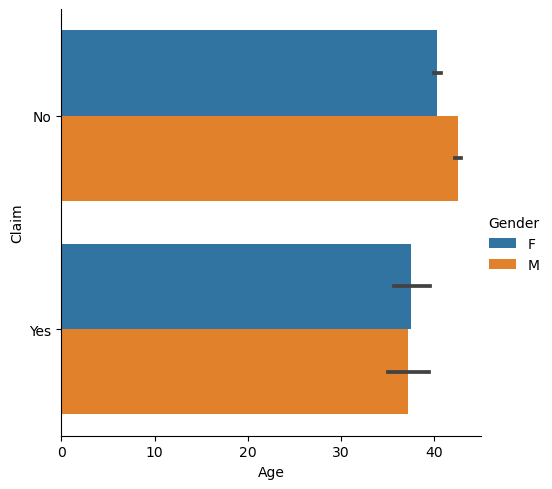

In [54]:
sns.catplot(x='Age',y='Claim',kind='bar',hue='Gender',data=new_df) 

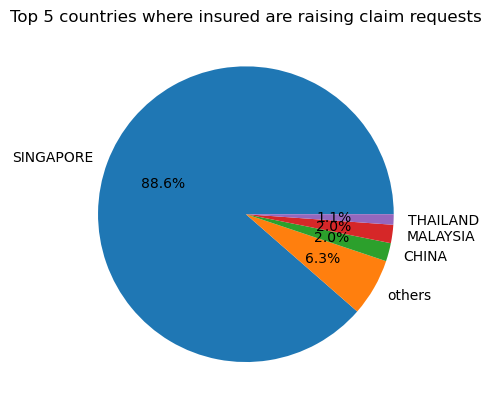

In [55]:
yes_claim=new_df.loc[new_df['Claim']=='Yes']
destination_claim= yes_claim.groupby(by=["Destination"]).size().reset_index(name="counts")
df_n_largest=destination_claim.nlargest(10,['counts'])

plt.pie(df_n_largest['counts'], labels=df_n_largest['Destination'], autopct='%1.1f%%')
plt.title('Top 5 countries where insured are raising claim requests')
plt.show()

# build the ML models

In [56]:
travels.head()

,index,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,net_sales,commision,Gender,Age
0,0,C2B,Airlines,Online,Bronze Plan,No,12,SINGAPORE,46.15,11.54,F,44
1,1,C2B,Airlines,Online,Bronze Plan,No,7,SINGAPORE,17.55,4.39,F,25
2,82,RAB,Airlines,Online,others,No,4,others,15.00,6.00,M,44
3,85,JZI,Airlines,Online,Basic Plan,No,45,others,26.00,9.10,M,31
4,87,JZI,Airlines,Online,Basic Plan,No,5,others,22.00,7.70,F,29


In [57]:
print('Agency Type\n',travels['Agency Type'].unique())
print('Agency\n',travels['Agency'].unique(),travels['Agency'].nunique())
print('Distribution Channel\n',travels['Distribution Channel'].unique())
print('Claim\n',travels['Claim'].unique())
print('Destination\n',travels['Destination'].unique(),travels['Destination'].nunique())
print('Gender\n',travels['Gender'].unique())

Agency Type
 ['Airlines' 'Travel Agency']
Agency
 ['C2B' 'RAB' 'JZI' 'ART' 'CBH' 'KML' 'CSR' 'CCR' 'ADM' 'LWC' 'TST' 'CWT'] 12
Distribution Channel
 ['Online' 'Offline']
Claim
 ['No' 'Yes']
Destination
 ['SINGAPORE' 'others' 'THAILAND' 'CHINA' 'MALAYSIA'] 5
Gender
 ['F' 'M']


In [58]:
# Now will perform encoding to convert categorical data in to numbers

travels.replace({'C2B':0,'CWT':1,'EPX':2,'RAB':3,'SSI':4,'JZI':5,'ART':6,'KML':7,'CSR':8,'LWC':9,'CBH':10,'CCR':11,'TST':12,'ADM':13},inplace=True)

In [59]:
travels.replace({'Airlines':0,'Travel Agency':1},inplace=True)

In [60]:
travels.replace({'Online':0,'Offline':1},inplace=True)

In [61]:
travels.replace({'No':0,'Yes':1},inplace=True)

In [62]:
travels.replace({'SINGAPORE':0,'others':1,'MALAYSIA':2,'THAILAND':4,'CHINA':5},inplace=True)

In [63]:
travels.replace({'F':0,'M':1},inplace=True)

In [64]:
travels['Product Name'].unique()

array(['Bronze Plan', 1, 'Basic Plan', 'Silver Plan'], dtype=object)

In [65]:
travels.replace({'Bronze Plan':0,'Basic Plan':2,'Silver Plan':3},inplace=True)

In [66]:
travels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12011 entries, 0 to 12010
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 12011 non-null  int64  
 1   Agency                12011 non-null  int64  
 2   Agency Type           12011 non-null  int64  
 3   Distribution Channel  12011 non-null  int64  
 4   Product Name          12011 non-null  int64  
 5   Claim                 12011 non-null  int64  
 6   Duration              12011 non-null  int64  
 7   Destination           12011 non-null  int64  
 8   net_sales             12011 non-null  float64
 9   commision             12011 non-null  float64
 10  Gender                12011 non-null  int64  
 11  Age                   12011 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 1.1 MB


In [67]:
travels.shape

(12011, 12)

# linear regression

In [68]:
# Separate object for target feature 
y = travels['commision']

# Separate object for Predictors 
X = travels.drop('commision',axis=1)

In [69]:
print('X Shape =',X.shape,'\ny Shape =',y.shape)

X Shape = (12011, 11) 
y Shape = (12011,)


## Building Model

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [71]:
print(X.shape, X_train.shape,X_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(12011, 11) (9608, 11) (2403, 11)
(12011,) (9608,) (2403,)


# Build the Linear Regression Algorithm

In [72]:
from sklearn.linear_model import LinearRegression # import linearRegression model
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [73]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

In [74]:
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

In [75]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)

rmse_train =  0.8524962139907178
rmse_test =  0.8427084483488814


In [76]:
r2_score(y_train,y_train_pred)*100

95.89041344249463

In [77]:
r2_score(y_test,y_test_pred)*100

95.99320222577482

##### Linear regrestion is completed I have found that the accuracy of train data is 95.36 and test data is 95.12

# DecisionTree Algorithm

In [78]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [79]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  4.7359278322264236e-14
rmse_test =  0.01937324220477185
train_score =  100.0
test_score =  99.99788238334374


# hyperparameters

In [80]:
# Number of trees in random Forest
criterion = ["squared_error", "friedman_mse", "absolute_error","poisson"]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [81]:
decetion_grid = {'criterion':criterion,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [82]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV( DM ,param_distributions = decetion_grid,cv=4,random_state = 0)

In [83]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              50]},
                   random_state=0)

In [84]:
rf_model.best_params_

{'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 47,
 'criterion': 'absolute_error'}

In [85]:
DM = DecisionTreeRegressor(criterion='absolute_error',min_samples_split= 15,min_samples_leaf= 1,max_features= 'auto',max_depth= 47)
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.03163223766376615
rmse_test =  0.06675415607517157
train_score =  99.99434186840074
test_score =  99.9748580274575


# Feature Selection Technique

In [86]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [87]:
print(selection.feature_importances_)

[2.55768528e-03 9.01310145e-02 4.74870346e-02 2.08520121e-02
 2.13519028e-02 1.95048511e-06 8.33777102e-03 2.22144282e-02
 7.86227028e-01 1.63610165e-05 8.22812460e-04]


In [88]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

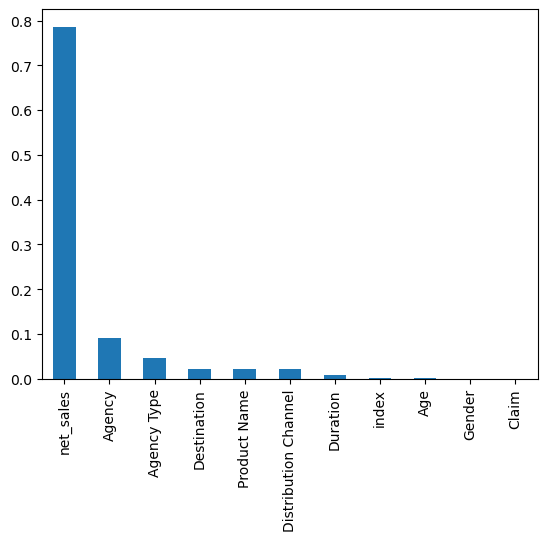

In [89]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [90]:
X_imp = X[feat_importances.nlargest(6).index]
X_imp

,net_sales,Agency,Agency Type,Destination,Product Name,Distribution Channel
0,46.15,0,0,0,0,0
1,17.55,0,0,0,0,0
2,15.00,3,0,1,1,0
3,26.00,5,0,1,2,0
4,22.00,5,0,1,2,0
...,...,...,...,...,...,...
12006,35.00,5,0,5,2,0
12007,18.00,5,0,1,2,0
12008,40.00,5,0,5,2,0
12009,18.00,5,0,2,2,0


In [91]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [92]:
DM = DecisionTreeRegressor()
DM.fit(X_train,y_train)
y_train_pred = DM.predict(X_train)
y_test_pred = DM.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.07502428138721895
rmse_test =  0.0708068357576617
train_score =  99.96799825620313
test_score =  99.97230312364708


After the decision tree, I get accuracy for Train and test (100 and 99.61), however,

I need to find the hyperparameters accuracy for training and testing ( 99.99 and 99.61), then

I wanted to do Feature Selection Technique accuracy for Train and test (  99.95 and 99.88).

For three techniques, I want to take the feature technique because it gives me the best accuracy for my data without overfiting.

# Random Forest Algorithm

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 14)

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.038535343299115614
rmse_test =  0.08754911537529231
train_score =  99.99155716270143
test_score =  99.95765677397453


# hyperparameters

In [96]:
# Number of trees in random Forest
n_estimators = [i for i in range(100,500,100)]
# Number of features to consider at every split
max_features = ["sqrt", "log2"]
# The depth of the tree max_depth
max_depth = [i for i in range(5,50,6)]
# Min samples required to split the node
min_sample_split = [2,5,10,15,50]
# Min no of samples required to each leaf to split  ---- Pruning
min_samples_leaf = [1,2,5,10]

In [97]:
# creating the random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_sample_split,
              'min_samples_leaf':min_samples_leaf}

In [98]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)

In [99]:
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [100]:
# best Parameter
rf_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 35}

In [101]:
RF = RandomForestRegressor(n_estimators = 400,min_samples_split = 15,min_samples_leaf =2,max_features ='sqrt',max_depth = 35)
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.35853491874058896
rmse_test =  0.4228833863274285
train_score =  99.2691422208095
test_score =  99.01208025527716


# Feature Selection Technique

In [102]:
# let me import Extra tree regressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [103]:
print(selection.feature_importances_)

[2.22889445e-03 8.43858661e-02 4.21536693e-02 2.17488439e-02
 3.12641886e-02 5.21292067e-06 1.11173278e-02 2.05337958e-02
 7.85643709e-01 2.37086940e-05 8.94782929e-04]


In [104]:
# let me plot feature importances 

feat_importances  =  pd.Series(selection.feature_importances_,index = X.columns)

<Axes: >

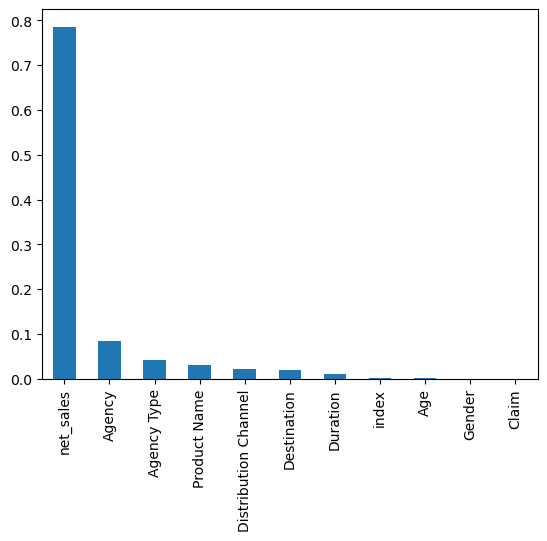

In [105]:
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [106]:
X_imp = X[feat_importances.nlargest(6).index]
X_imp

,net_sales,Agency,Agency Type,Product Name,Distribution Channel,Destination
0,46.15,0,0,0,0,0
1,17.55,0,0,0,0,0
2,15.00,3,0,1,0,1
3,26.00,5,0,2,0,1
4,22.00,5,0,2,0,1
...,...,...,...,...,...,...
12006,35.00,5,0,2,0,5
12007,18.00,5,0,2,0,1
12008,40.00,5,0,2,0,5
12009,18.00,5,0,2,0,2


In [107]:
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,test_size =0.2,random_state = 14)

In [108]:
rf_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv=4,random_state = 0)
rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4,
                   estimator=RandomForestRegressor(max_depth=35,
                                                   max_features='sqrt',
                                                   min_samples_leaf=2,
                                                   min_samples_split=15,
                                                   n_estimators=400),
                   param_distributions={'max_depth': [5, 11, 17, 23, 29, 35, 41,
                                                      47],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [109]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('rmse_train = ',rmse_train)
print('rmse_test = ',rmse_test)
train_score = r2_score(y_train,y_train_pred)
test_score = r2_score(y_test,y_test_pred)
print('train_score = ',train_score*100)
print('test_score = ',test_score*100)

rmse_train =  0.07707901892344969
rmse_test =  0.0880263239483802
train_score =  99.96622134818293
test_score =  99.95719391102408


After the random forest, I get accuracy for Train and test (99.97 and 99.90), however,

I need to find the hyperparameters accuracy for training and testing (99.23 and 99.87), then

I wanted to do Feature Selection Technique accuracy for Train and test ( 99.94 and 99.90).

For three techniques, I want to take the feature technique because it gives me the best accuracy for my data with out overfiting.

# conclusion:-
    
I got accuracy of train data is 95.36 and test data is 95.12 from Linear regrestion

I got accuracy of Train and test ( 99.95 and 99.88) from Decision Tree.

I got accuracy of Train and test ( 99.94 and 99.90) from Random Forest.

Finally, i got best accuracy from Random Forest without overfiting and underfiting as well.